In [5]:
import mysql.connector as con
import pandas as pd  # for loading data

#plots the figures in place instead of a new window
%matplotlib inline  
import matplotlib.pyplot as plt

In [6]:
connection = con.connect(user = 'root', password = "root", database = 'foodb')

In [7]:
contents = pd.read_sql("SELECT * FROM contents", connection)

### Analyzing foods and nutrients

First we select those rows which are describing nutrients. We can select them by checking the *source_type* of the row.

In [9]:
nutrients = contents[contents.source_type == "Nutrient"]

Now we want to see the most common nutrients. We can find them by grouping the rows by the nutrients and counting the different foods they appear in. So we group the rows by the attribute *source_id* and count for each *source_id* the different (unique) *orig_food_id*s. 

In [10]:
gb_sourceid = nutrients.groupby(contents.source_id).orig_food_id.nunique()

We want to see how this grouping looks like, so we just call the plot function for the result.

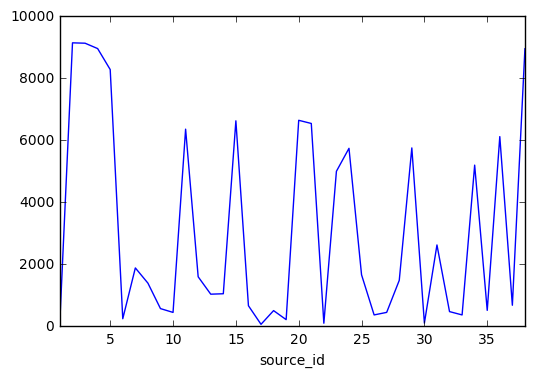

In [11]:
gb_sourceid.plot()

As we see, we have in our dataset about 40 differents nutreints and some of them are present in more than 8000 foods.

Now we want to get the name of the nutrient which is present in the most foods. For this we first get the id of the nutrient, then we select the first row the nutrient is present in, and we get the name of the nutrient from this row.

In [12]:
sourceid_maxfood = gb_sourceid.idxmax()
contents[contents.source_id == sourceid_maxfood].head(1).orig_source_name.values[0]

'Protein, total'

As we see, the protein is the most common nutrient.

#### Group by foods

We are also want to find the most nutrious foods. In other words, the food which contains the most kinds of nutrients.
For this we group by the rows by the ids of the foods, *orig_food_id*, and we count the ids of the different nutreins in each food, *source_id*.

In [19]:
gb_foodid = nutrients.groupby(contents.orig_food_id).source_id.nunique()

We plot the result to see the new data.

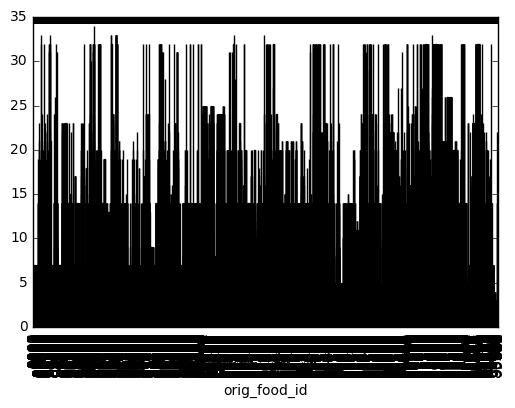

In [18]:
gb_foodid.plot(kind='bar')

As we see, a lot of foods contain more than 30 different nutrients.

Next, we select the food with the most different nutrients using the *idxmax* function.
After we have got the id of the most nutrious food, we select the first row in which this food appears, and we get its common name.

In [20]:
foodid_maxsource = gb_foodid.idxmax()
contents[contents.orig_food_id == foodid_maxsource].head(1).orig_food_common_name.values[0]

'Margarine-like, vegetable oil spread, approximately 37% fat, unspecified oils, with salt, with added vitamin D'

According to this dataset, the most nutrious food is the margarine-like vegetable oil. We presume that it is fortified, this is why it has so many nutrients.